In [1]:
import scipy.io
import numpy as np
import pickle
from os import listdir
from os.path import isfile, join
from PIL import Image

In [4]:
labels_path = '../../data/data_birds/CUB_200_2011/image_class_labels.txt'
train_test_split_path = '../../data/data_birds/CUB_200_2011/train_test_split.txt'

data_path = '../../data/data_birds/CUB_200_2011/images/'

### Get test and train labels

In [5]:
# First get all the labels
labels = np.loadtxt(fname=labels_path, dtype="int16")

y_labels = labels[:,1]

In [6]:
y_labels

array([  1,   1,   1, ..., 200, 200, 200], dtype=int16)

In [7]:
# Secondly get train test split of images and labels

train_test_split = np.loadtxt(fname=train_test_split_path, dtype="int16")
train_test_split = train_test_split[:, 1]

In [8]:
# Get train and test indices
train_idxs = np.where(train_test_split == 1)[0]
test_idxs = np.where(train_test_split == 0)[0]

In [9]:
print(train_idxs[:5])
test_idxs[:5]

[1 3 4 6 7]


array([ 0,  2,  5,  9, 11], dtype=int64)

In [10]:
train_idxs.shape

(5994,)

In [11]:
test_idxs.shape

(5794,)

In [12]:
y_train = y_labels[train_idxs]
y_test = y_labels[test_idxs]

In [13]:
from collections import Counter

Counter(y_test)

Counter({1: 30,
         2: 30,
         3: 28,
         4: 30,
         5: 14,
         6: 11,
         7: 23,
         8: 18,
         9: 29,
         10: 30,
         11: 30,
         12: 26,
         13: 30,
         14: 30,
         15: 28,
         16: 28,
         17: 27,
         18: 15,
         19: 29,
         20: 29,
         21: 30,
         22: 26,
         23: 29,
         24: 22,
         25: 30,
         26: 30,
         27: 30,
         28: 29,
         29: 30,
         30: 30,
         31: 30,
         32: 23,
         33: 29,
         34: 29,
         35: 30,
         36: 30,
         37: 29,
         38: 30,
         39: 29,
         40: 30,
         41: 30,
         42: 30,
         43: 29,
         44: 30,
         45: 30,
         46: 30,
         47: 30,
         48: 30,
         49: 30,
         50: 30,
         51: 30,
         52: 30,
         53: 30,
         54: 30,
         55: 30,
         56: 30,
         57: 30,
         58: 28,
         59: 30,
      

In [11]:
y_test.shape

(5794,)

### Load in images as numpy array

In [14]:
# First get folders
# data_path
folders = listdir(data_path)  # TODO check is folder
imgs = []

In [15]:
for folder in folders:  
    path = data_path + folder + "/"
    
    # TODO load in images
    imgs.extend([join(path, f) for f in listdir(path) if isfile(join(path, f))])

In [16]:
imgs = np.array(imgs)

In [17]:
imgs.shape

(120,)

In [18]:
imgs[:]

array([ '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0005_796090.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0006_796065.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0007_796138.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0008_796083.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
       '../../data/data_birds/CUB_200_2011/images/001.Black_foo

In [19]:
train_imgs = imgs[train_idxs]
test_imgs = imgs[test_idxs]

IndexError: index 120 is out of bounds for axis 1 with size 120

In [18]:
train_imgs.shape

(5994,)

In [19]:
test_imgs.shape

(5794,)

In [267]:
def load_img(path, new_size = 256):
    im = Image.open(path)
    if im.size[0] < im.size[1]:
        size_perc = new_size/im.size[0]
    else:
        size_perc = new_size/im.size[1]

    im = im.resize((int(round(im.size[0]*size_perc, 0)), int(round(im.size[1]*size_perc, 0))), Image.ANTIALIAS)
    rgb_im = im.convert('RGB')  # Some imageses are in Grayscale
    rgb_im = np.array(rgb_im)
    return np.array(rgb_im)

def center_crop(img_mat, size = (224, 224)):
    w,h,c = img_mat.shape
    start_h = h//2-(size[1]//2)  # Size[1] - h of cropped image
    start_w = w//2-(size[0]//2)  # Size[0] - w of cropepd image
    return img_mat[start_w:start_w+size[0],start_h:start_h+size[1], :]

In [21]:
# Fill in x_train array with train data
len_train = len(train_imgs)

size = (256,256)
x_train = np.empty((len_train, 256, 256, 3), dtype="float32")

for i, img_path in enumerate(train_imgs):
    x_train[i] = load_img(img_path, size = size)

In [23]:
x_train.shape

(5994, 256, 256, 3)

In [22]:
# Fill in x_test array with test data

size_crop = (224, 224)
size = (256, 256)

len_test = len(test_imgs)

x_test = np.empty((len_test, 224, 224, 3), dtype="float32")


for i, img_path in enumerate(test_imgs):    
    img_mat = load_img(test_data_path + img_path, size = size)  # First scale to (256,256)
    x_test[i] = center_crop(img_mat, size = size_crop)  # Crop center of the image


NameError: name 'len_test' is not defined

In [ ]:
x_test.shape

In [ ]:
1 - 224/256  # 0.125 crop

In [ ]:

    return ((x_train, y_train), (x_test, y_test))

In [73]:
from image_gen_extended import random_crop
import numpy as np

Using TensorFlow backend.


In [7]:
random_crop(x, (224,224)).shape

(256, 256, 3)


(224, 224, 3)

## Test image cropping and etc

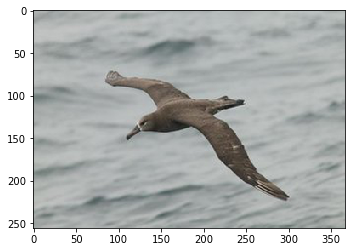

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load in image

Image is resized so its shorter side is 256 pixels long.

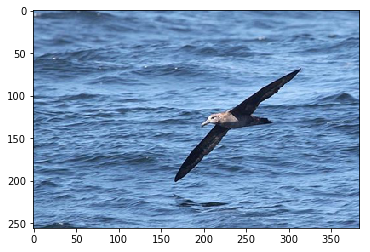

(256, 384, 3)


In [213]:
im = Image.open(imgs[20])
new_size = 256
if im.size[0] < im.size[1]:
    size_perc = new_size/im.size[0]
else:
    size_perc = new_size/im.size[1]

im = im.resize((int(round(im.size[0]*size_perc, 0)), int(round(im.size[1]*size_perc, 0))), Image.ANTIALIAS)
rgb_im = im.convert('RGB')  # Some imageses are in Grayscale
rgb_im = np.array(rgb_im)
#size = (256, 256)

plt.imshow(rgb_im)
plt.show()
print(rgb_im.shape)

### Center crop

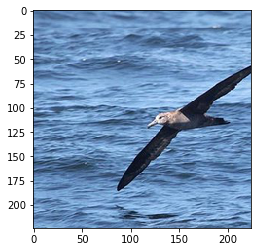

(224, 224, 3)

In [214]:
plt.imshow(center_crop(rgb_im))
plt.show()
center_crop(rgb_im).shape

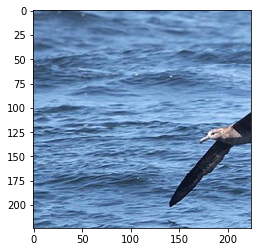

In [215]:
plt.imshow(random_crop(rgb_im, (224,224)))
plt.show()

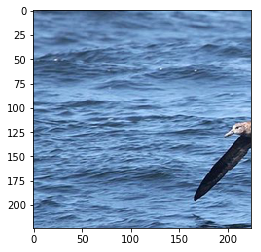

In [266]:
plt.imshow(random_crop(rgb_im, (224,224)))
plt.show()

In [306]:
x = np.zeros((26, 25, 3))

In [307]:
x.shape

(26, 25, 3)

In [308]:
x[0, 0, 0] = 1
x[0, 0, 1] = 2
x[0, 0, 2] = 3

In [309]:
x = x[..., ::-1]
x.shape

(26, 25, 3)

In [310]:
x[0,0, :]

array([ 3.,  2.,  1.])

In [312]:
x2 = [x]

In [315]:
x2 = np.asarray(x2)

In [316]:
x2.shape

(1, 26, 25, 3)